In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
import reports
import utilities
import clean
import normalize
import re
import os
from os import listdir
from os.path import isfile, join
import collections

In [4]:
%matplotlib inline

In [5]:
wordlist_dir = "/Users/jeriwieringa/Dissertation/drafts/data/word-lists"
wordlists = ["2016-12-07-SDA-last-names.txt", 
             "2016-12-07-SDA-place-names.txt", 
             "2016-12-08-SDA-Vocabulary.txt", 
             "2017-01-03-place-names.txt", 
             "2017-02-14-Base-Word-List-SCOWL&KJV.txt",
             "2017-02-14-Roman-Numerals.txt",
             "2017-03-01-Additional-Approved-Words.txt"
            ]

In [6]:
spelling_dictionary = utilities.create_spelling_dictionary(wordlist_dir, wordlists)

In [7]:
title = "GH"

In [8]:
base_dir = "/Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/{}/".format(title)

## Baseline

In [9]:
cycle = 'baseline'

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/GH/baseline

Average verified rate: 0.937820099911431

Average of error rates: 0.06425506673257539

Total token count: 2285224



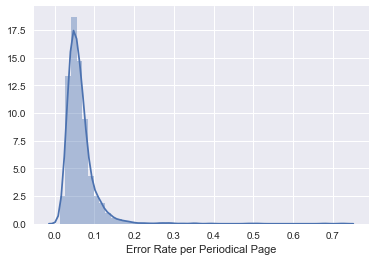

In [10]:
stats = reports.overview_report(join(base_dir, cycle), spelling_dictionary, title)

In [11]:
errors_summary = reports.get_errors_summary( stats )
reports.top_errors( errors_summary, 100 )

[('-', 4029),
 ("'", 2999),
 ('ñ', 2726),
 ('e', 2495),
 ('m', 2108),
 ('w', 1965),
 ('¥', 1750),
 ('t', 1544),
 ('r', 1535),
 (')', 1342),
 ('re-', 1261),
 ('d', 1107),
 ('f', 1100),
 ('con-', 1076),
 ('in-', 1058),
 ('g', 1037),
 ('n', 975),
 ('be-', 911),
 ('tion', 907),
 ('de-', 656),
 ('oo', 613),
 ('x', 591),
 ('com-', 526),
 ('(', 520),
 ('ment', 495),
 ('ex-', 487),
 ('th', 420),
 ('en-', 420),
 ('mis-', 371),
 ('dis-', 364),
 ('_', 359),
 ('un-', 320),
 ('pro-', 299),
 ('ple', 283),
 ('ers', 277),
 ('ac-', 272),
 ('im-', 267),
 ('ence', 266),
 ('per-', 264),
 ('tions', 261),
 ('peo-', 258),
 ('pre-', 256),
 ('/', 255),
 ('at-', 252),
 ('ad-', 228),
 ('ga', 222),
 ('co', 213),
 ('*', 209),
 ('to-', 206),
 ('sab-', 204),
 ('meet-', 204),
 ("'the", 202),
 ('ful', 197),
 ('ly', 197),
 ('col-', 190),
 ('ments', 187),
 ('an-', 186),
 ('ber', 185),
 ('the-', 181),
 ('al-', 178),
 ('for-', 168),
 ('ap-', 166),
 ('sionary', 164),
 ('k', 159),
 ("the'", 157),
 ('ance', 156),
 ('u', 155)

## Check Special Character Use

In [12]:
reports.tokens_with_special_characters(errors_summary)

[('ñ', 2726),
 ('¥', 1750),
 (')', 1342),
 ('(', 520),
 ('_', 359),
 ('/', 255),
 ('*', 209),
 ('ã', 125),
 ('ñthe', 90),
 ('%', 81),
 ('`', 80),
 ('=', 75),
 ('ñselected', 67),
 (']', 63),
 ('**', 52),
 ('+', 52),
 ('(continued', 47),
 ('tennã', 46),
 ('¥¥', 46),
 ('ô', 44),
 ('ña', 41),
 ('[the', 39),
 ('(the', 38),
 ('(see', 38),
 ('¡', 37),
 ('[', 37),
 ('(gen', 36),
 ('(verse', 34),
 ('\\', 34),
 ('(concluded', 32),
 ('(entered', 32),
 ('ñmrs', 31),
 ('ñsingle', 30),
 ('•', 30),
 ('(rom', 30),
 ('(rev', 30),
 ('(a)', 29),
 ('(heb', 29),
 ('(b)', 28),
 ('(i', 28),
 ('(john', 27),
 ('ñin', 26),
 ('_the', 26),
 ('(matt', 25),
 ('i)', 25),
 ('(isa', 24),
 ('(acts', 23),
 ('ñand', 23),
 ('ñed', 23),
 ('(and', 22),
 ('#', 22),
 ('ñanon', 22),
 ('¥¥¥', 22),
 ('—', 21),
 ('(c)', 21),
 ('¥the', 21),
 ("t('", 21),
 ("('", 20),
 ('ñthat', 20),
 ('the_', 20),
 ('(for', 19),
 ('the¥', 18),
 ('(ex', 16),
 ('ñj', 16),
 ('ñc', 16),
 ('ñto', 16),
 ('-¥', 15),
 ('ñsel', 15),
 ('\ufeff', 15),
 ('¥an

## Correction 1 -- Normalize Characters

In [13]:
# %load shared_elements/normalize_characters.py
prev = "baseline"
cycle = "correction1"

directories = utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = utilities.readfile(directories['prev'], filename)

    # Substitute for all other dashes
    content = re.sub(r"—-—–‑", r"-", content)

    # Substitute formatted apostrophe
    content = re.sub(r"’", r"'", content)
    
    # Replace all special characters with a space (as these tend to occur at the end of lines)
    content = re.sub(r"[^a-zA-Z0-9\s,.!?$:;\-&\'\"]", r" ", content)
    
    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

## Check Correction 1

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/GH/correction1

Average verified rate: 0.9442694976452395

Average of error rates: 0.057778546712802775

Total token count: 2278788



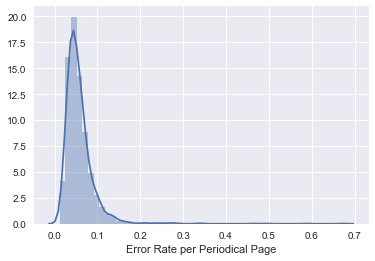

In [14]:
# %load shared_elements/summary.py
summary = reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [15]:
# %load shared_elements/top_errors.py
errors_summary = reports.get_errors_summary( summary )
reports.top_errors( errors_summary, 10 )[:50]

[('-', 4194),
 ("'", 3209),
 ('e', 2551),
 ('m', 2132),
 ('w', 1985),
 ('t', 1634),
 ('r', 1596),
 ('re-', 1264),
 ('f', 1151),
 ('d', 1134),
 ('con-', 1077),
 ('g', 1066),
 ('in-', 1059),
 ('n', 998),
 ('be-', 913),
 ('tion', 910),
 ('de-', 656),
 ('oo', 614),
 ('x', 598),
 ('com-', 528),
 ('ment', 497),
 ('ex-', 487),
 ('th', 423),
 ('en-', 422),
 ('mis-', 372),
 ('dis-', 364),
 ('un-', 321),
 ('pro-', 299),
 ('ple', 285),
 ('ers', 279),
 ('ac-', 272),
 ('im-', 267),
 ('ence', 266),
 ('per-', 264),
 ('tions', 261),
 ('peo-', 258),
 ('pre-', 256),
 ('at-', 252),
 ('ad-', 228),
 ('ga', 222),
 ('co', 219),
 ('to-', 206),
 ('sab-', 204),
 ('meet-', 204),
 ("'the", 202),
 ('ly', 199),
 ('ful', 197),
 ('col-', 191),
 ('ments', 188),
 ('an-', 186)]

## Correction 2 -- Fix Line Endings

In [16]:
# %load shared_elements/correct_line_endings.py
prev = "correction1"
cycle = "correction2"

directories = utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = utilities.readfile(directories['prev'], filename)

    content = re.sub(r"(\w+)(\-\s{1,})([a-z]+)", r"\1\3", content)

    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

## Check Correction 2

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/GH/correction2

Average verified rate: 0.9667102022955556

Average of error rates: 0.035403855659911034

Total token count: 2239545



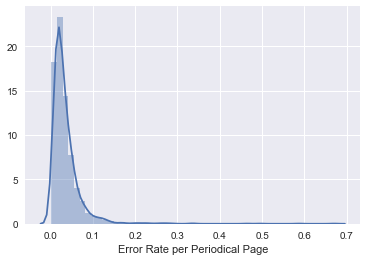

In [17]:
# %load shared_elements/summary.py
summary = reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [18]:
# %load shared_elements/top_errors.py
errors_summary = reports.get_errors_summary( summary )
reports.top_errors( errors_summary, 10 )[:50]

[('-', 4147),
 ("'", 3209),
 ('e', 2543),
 ('m', 2129),
 ('w', 1984),
 ('t', 1628),
 ('r', 1591),
 ('f', 1151),
 ('d', 1132),
 ('g', 1065),
 ('n', 991),
 ('oo', 613),
 ('x', 596),
 ('th', 423),
 ('ga', 220),
 ('co', 214),
 ("'the", 202),
 ('k', 174),
 ('--', 169),
 ('u', 163),
 ("the'", 160),
 ('-the', 148),
 ('io', 143),
 ("''", 131),
 ('pp', 130),
 ('ex', 129),
 ('z', 113),
 ("'of", 111),
 ('thot', 107),
 ('pa', 106),
 ('jno', 98),
 ('ky', 97),
 ('wm', 94),
 ("'and", 89),
 ('-to', 87),
 ('va', 84),
 ("an'", 83),
 ('tion', 82),
 ('ro', 81),
 ('ma', 76),
 ("'to", 76),
 ('al', 75),
 ("'a", 75),
 ("to'", 75),
 ("'tis", 74),
 ('-and', 74),
 ('-of', 72),
 ('altho', 71),
 ('con-', 69),
 ('mt', 68)]

## Correction 3 -- Remove extra dashes

In [19]:
# %load shared_elements/remove_extra_dashes.py
prev = "correction2"
cycle = "correction3"

directories = utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = utilities.readfile(directories['prev'], filename)
    
    text = re.sub(r"[0-9,!?$:;&]", " ", content)
    tokens = utilities.tokenize_text(text)
    
    replacements = []
    for token in tokens:
        if token[0] is "-":
            replacements.append((token, token[1:]))
            
        elif token[-1] is "-":
            replacements.append((token, token[:-1]))
        else:
            pass
        
    if len(replacements) > 0:
        print("{}: {}".format(filename, replacements))
        
        for replacement in replacements:
            content = clean.replace_pair(replacement, content)
    else:
        pass

    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

GH18980501-V01-01-page11.txt: [('-', '')]
GH18980501-V01-01-page12.txt: [('-', ''), ('-', ''), ('-', ''), ('-', ''), ('---', '--')]
GH18980501-V01-01-page2.txt: [('pur-', 'pur'), ('-', '')]
GH18980501-V01-01-page4.txt: [('minis-', 'minis'), ('-', ''), ('so.-', 'so.'), ('-', ''), ('"-', '"'), ('-the', 'the')]
GH18980501-V01-01-page5.txt: [('admi-', 'admi'), ('rapid-', 'rapid')]
GH18980501-V01-01-page6.txt: [('-', ''), ('-', ''), ('-', ''), ('-', ''), ('-', ''), ('-', ''), ('-', ''), ('-', ''), ('-', ''), ('-', ''), ('phos-', 'phos'), ('-', ''), ('-', ''), ('-', ''), ('-', ''), ('-', ''), ('-', ''), ('-', ''), ('-', '')]
GH18980501-V01-01-page8.txt: [('-', '')]
GH18980501-V01-01-page9.txt: [('large-', 'large')]
GH18980701-V01-02-page1.txt: [('practi-', 'practi'), ('con-', 'con')]
GH18980701-V01-02-page10.txt: [('HER-', 'HER'), ('Smith-', 'Smith'), ('HER-', 'HER')]
GH18980701-V01-02-page2.txt: [('heaven-', 'heaven')]
GH18980701-V01-02-page3.txt: [('practi-', 'practi')]
GH18980701-V01-02-p

## Check Correction 3

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/GH/correction3

Average verified rate: 0.9718482863796035

Average of error rates: 0.030168067226890763

Total token count: 2241249



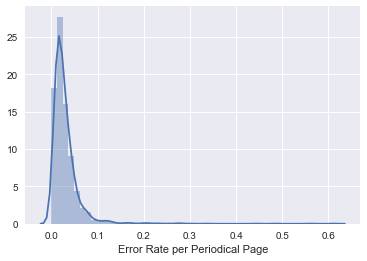

In [20]:
# %load shared_elements/summary.py
summary = reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [21]:
# %load shared_elements/top_errors.py
errors_summary = reports.get_errors_summary( summary )
reports.top_errors( errors_summary, 10 )[:50]

[("'", 3326),
 ('e', 2582),
 ('m', 2151),
 ('w', 1994),
 ('t', 1667),
 ('r', 1620),
 ('f', 1168),
 ('d', 1144),
 ('g', 1083),
 ('n', 1010),
 ('x', 619),
 ('oo', 614),
 ('th', 434),
 ('co', 295),
 ('ga', 221),
 ("'the", 204),
 ('k', 180),
 ('u', 169),
 ('ex', 167),
 ("the'", 165),
 ('re', 153),
 ('io', 148),
 ("''", 136),
 ('pp', 130),
 ('z', 121),
 ('pa', 113),
 ("'of", 111),
 ('thot', 107),
 ('ky', 98),
 ('jno', 98),
 ('wm', 94),
 ("'and", 90),
 ('tion', 86),
 ('al', 85),
 ('ro', 85),
 ('va', 85),
 ("an'", 84),
 ('ma', 80),
 ("'to", 77),
 ("'a", 75),
 ("to'", 75),
 ("'tis", 75),
 ('altho', 72),
 ('mc', 72),
 ('ti', 72),
 ('mt', 69),
 ("'s", 68),
 ('brot', 65),
 ('zo', 64),
 ('maynor', 61)]

## Correction 4 -- Remove extra quotation marks

In [22]:
# %load shared_elements/replace_extra_quotation_marks.py
prev = "correction3"
cycle = "correction4"

directories = utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = utilities.readfile(directories['prev'], filename)
    
    text = re.sub(r"[0-9,!?$:;&]", " ", content)
    tokens = utilities.tokenize_text(text)
    
    corrections = []
    for token in tokens:
        token_list = list(token)
        last_char = token_list[-1]

        if last_char is "'":
            if len(token) > 3:
                if token_list[-2] is 's' or 'S':
                    pass
                else:
                    corrections.append((token, re.sub(r"'", r"", token)))
            else:
                pass
        elif token[0] is "'":
            if len(token) > 2:
                corrections.append((token, re.sub(r"'", r"", token)))  
            else:
                pass
        else:
            pass
    
    if len(corrections) > 0:
#         print('{}: {}'.format(filename, corrections))

        for correction in corrections:
            content = clean.replace_pair(correction, content)
    else:
        pass

    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

## Check Correction 4

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/GH/correction4

Average verified rate: 0.9734787400661291

Average of error rates: 0.02856351952545725

Total token count: 2241070



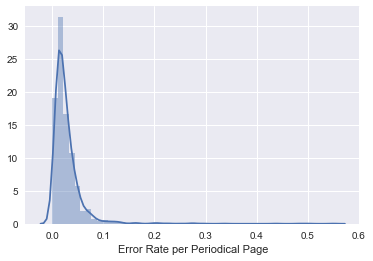

In [23]:
# %load shared_elements/summary.py
summary = reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [24]:
# %load shared_elements/top_errors.py
errors_summary = reports.get_errors_summary( summary )
reports.top_errors( errors_summary, 10 )[:50]

[("'", 3130),
 ('e', 2595),
 ('m', 2154),
 ('w', 1994),
 ('t', 1675),
 ('r', 1628),
 ('f', 1175),
 ('d', 1147),
 ('g', 1085),
 ('n', 1015),
 ('x', 620),
 ('oo', 614),
 ('th', 436),
 ('co', 297),
 ('ga', 222),
 ('k', 179),
 ('u', 169),
 ('ex', 168),
 ('re', 166),
 ("the'", 161),
 ('io', 149),
 ('pp', 130),
 ('z', 121),
 ("''", 120),
 ('pa', 112),
 ('thot', 108),
 ('ky', 99),
 ('jno', 98),
 ('wm', 95),
 ('tion', 87),
 ('ro', 86),
 ('al', 85),
 ('va', 85),
 ("an'", 83),
 ('ma', 80),
 ("to'", 75),
 ("'a", 74),
 ('altho', 74),
 ('ti', 74),
 ('mc', 72),
 ('mt', 69),
 ("'s", 67),
 ('brot', 65),
 ('zo', 64),
 ('em', 62),
 ('maynor', 61),
 ('ft', 61),
 ('ip', 61),
 ('es', 58),
 ("and'", 58)]

## Correction 5 -- Rejoin Burst Words

In [25]:
# %load shared_elements/rejoin_burst_words.py
prev = "correction4"
cycle = "correction5"

directories = utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = utilities.readfile(directories['prev'], filename)

    pattern = re.compile("(\s(\w{1,2}\s){5,})")
    
    replacements = []
    clean.check_splits(pattern, spelling_dictionary, content, replacements)
    
    if len(replacements) > 0:
#         print('{}: {}'.format(filename, replacements))

        for replacement in replacements:
            content = clean.replace_pair(replacement, content)
    else:
        pass

    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

## Check Correction 5

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/GH/correction5

Average verified rate: 0.9734260605463078

Average of error rates: 0.028585269401878402

Total token count: 2241557



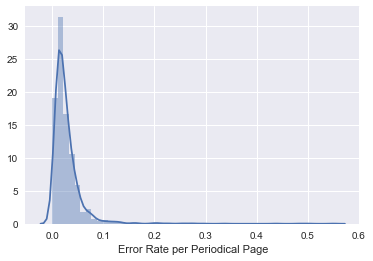

In [26]:
# %load shared_elements/summary.py
summary = reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [27]:
# %load shared_elements/top_errors.py
errors_summary = reports.get_errors_summary( summary )
reports.top_errors( errors_summary, 10 )[:50]

[("'", 3130),
 ('e', 2589),
 ('m', 2152),
 ('w', 1992),
 ('t', 1674),
 ('r', 1625),
 ('f', 1175),
 ('d', 1142),
 ('g', 1085),
 ('n', 1012),
 ('x', 620),
 ('oo', 614),
 ('th', 436),
 ('co', 297),
 ('ga', 222),
 ('k', 179),
 ('ex', 168),
 ('re', 168),
 ('u', 164),
 ("the'", 161),
 ('io', 149),
 ('pp', 130),
 ('z', 121),
 ("''", 120),
 ('pa', 112),
 ('thot', 108),
 ('ky', 99),
 ('jno', 98),
 ('wm', 95),
 ('tion', 87),
 ('ro', 86),
 ('va', 85),
 ('al', 84),
 ("an'", 83),
 ('ma', 80),
 ("to'", 75),
 ("'a", 74),
 ('altho', 74),
 ('ti', 74),
 ('mc', 72),
 ('mt', 69),
 ('uthern', 67),
 ("'s", 67),
 ('brot', 65),
 ('zo', 64),
 ('em', 62),
 ('maynor', 61),
 ('ft', 61),
 ('ip', 61),
 ('es', 58)]

## Correction 6 -- Rejoin Split Words

In [28]:
# %load shared_elements/rejoin_split_words.py
prev = "correction5"
cycle = "correction6"

directories = utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = utilities.readfile(directories['prev'], filename)
    
    text = re.sub(r"[0-9,!?$:;&]", " ", content)
    tokens = utilities.tokenize_text(text)
    errors = reports.identify_errors(tokens, spelling_dictionary)

    replacements = clean.check_if_stem(errors, spelling_dictionary, tokens, get_prior=True)
    
    if len(replacements) > 0:
#         print('{}: {}'.format(filename, replacements))

        for replacement in replacements:
            content = clean.replace_split_words(replacement, content)
    else:
        pass

    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

## Check Correction 6

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/GH/correction6

Average verified rate: 0.9738946440103669

Average of error rates: 0.028095402867029166

Total token count: 2240613



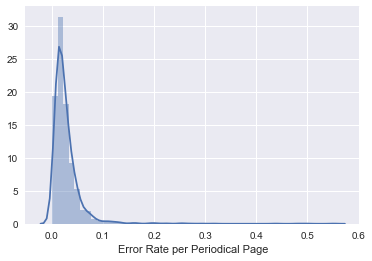

In [29]:
# %load shared_elements/summary.py
summary = reports.overview_report(directories['cycle'], spelling_dictionary, title)

## Review Remaining Errors

In [30]:
reports.docs_with_high_error_rate(summary)

[('GH19171201-V11-12-page7.txt', 0.551),
 ('GH19171201-V11-12-page6.txt', 0.499),
 ('GH19001201-V02-12-page7.txt', 0.482),
 ('GH19171201-V11-12-page2.txt', 0.438),
 ('GH19191001-V13-10-page1.txt', 0.317),
 ('GH19171201-V11-12-page3.txt', 0.294),
 ('GH19191001-V13-10-page9.txt', 0.273),
 ('GH19190901-V13-09-page1.txt', 0.258),
 ('GH19011201-V03-12-page14.txt', 0.252),
 ('GH19000601-V02-06-page23.txt', 0.252),
 ('GH19160501-V10-05-page2.txt', 0.225),
 ('GH19200101-V14-01-page1.txt', 0.224),
 ('GH19000601-V02-06-page24.txt', 0.206)]

In [31]:
doc_keys = [x[0] for x in reports.docs_with_high_error_rate(summary) if x[1] > 0.225]

In [32]:
# utilities.open_original_docs(doc_keys, directories['cycle'])

There was a scanning error with V11-12 such that the pages are overlapping. 

In [33]:
reports.long_errors(errors_summary, min_length=15)

(['memfifty-thousand',
  "strachan'slecture",
  'estabscholarship',
  'church-superstition',
  'hundredchristian',
  "surrendet'edfully",
  "limited'knowledge",
  'nmmmeommimmmmmmwmn',
  "ellarik'westrfeacho's",
  'onetwenty-eighth',
  'uncomfortstrength',
  'thousand-and-one',
  'eaeciallyhedfied',
  'oaaaaaaaaaaaaaaaaaaaaaa',
  'unnmmunomamommonmmnnum',
  'uncharacteristics',
  'arisingtherefrom',
  'nine-hundred-acre',
  "bo'pleakkithilkfithg",
  'tent-caterpillars',
  'cccccccccccticccctt',
  "gregationtic'itineficwnift",
  'iitiliiiiiiiiittilimiiiiiiiiiiii',
  'jwitinljuliinliimit',
  'non-profit-sharing',
  'theserecommendations',
  'qubgtiiailliwoftenotisited',
  'ogligrsatiaarniqxjg',
  'isaiahprophesied',
  'religio-political',
  'imilipftilimmommnralmfter',
  'iiimminirelsofte',
  'manufacturingtowns',
  'well-ascertained',
  'inmkesimaliimmemm',
  'sisterannabutletrh',
  'circumstantiatial',
  'inwmiimminonvomm',
  'iiiiiiiiiiiiiiiiil',
  'wilikalkakalkalal',
  'humanhhiisst

## Correction 7 -- Remove Long Errors

In [35]:
# %load shared_elements/remove-tokens-with-long-strings-of-characters.py
prev = cycle
cycle = "correction7"

directories = utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = utilities.readfile(directories['prev'], filename)

    text = re.sub(r"[0-9,!?$:;&]", " ", content)
    tokens = utilities.tokenize_text(text)
    
    replacements = []
    replacements.append(clean.check_for_repeating_characters(tokens, "i|I"))
    replacements.append(clean.check_for_repeating_characters(tokens, "a|A"))
    replacements.append(clean.check_for_repeating_characters(tokens, "m|M"))
    replacements.append(clean.check_for_repeating_characters(tokens, "l|L"))
    replacements.append(clean.check_for_repeating_characters(tokens, "g|G"))
    
    replacements = [item for sublist in replacements for item in sublist]
            
    if len(replacements) > 0:
        print('{}: {}'.format(filename, replacements))

        for replacement in replacements:
            content = clean.replace_pair(replacement, content)
    else:
        pass
    
    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

GH18990801-V01-10-page8.txt: [('AAAAWAAWAAAAAAAAAAAAAAAJ', ' ')]
GH18991001-V01-11-page21.txt: [('AAAAAAAAAAAAAAAAAINAAAAAAAAWA', ' ')]
GH19000701-V02-07-page13.txt: [('iilagiggigliggggiggagggAgEzLviAghtiggaggilriAtt', ' '), ('ggiggTggiAlligEt', ' '), ('ggiggItgigglaggg', ' ')]
GH19010801-V03-08-page7.txt: [('IMMOIMOMMIIMMW', ' ')]
GH19021022-V04-41-page6.txt: [('Oaaaaaaaaaaaaaaaaaaaaaa.', ' ')]
GH19021112-V04-44-page5.txt: [('aa.aalaFvaaasasap.', ' ')]
GH19021224-V04-50-page6.txt: [('AisaaaaaaalaaaS', ' ')]
GH19140601-V10-06-page1.txt: [('AAMPAAAIISAANIAAAAVA', ' ')]
GH19140801-V10-08-page1.txt: [('VgiarammullhgearellrellmmillImmmiirall', ' '), ('VgiarammullhgearellrellmmillImmmiirall', ' ')]
GH19151201-V11-12-page1.txt: [('IIMIMPAIIPIII', ' ')]
GH19160101-V10-01-page1.txt: [('ammiragiommlimmiman', ' ')]
GH19160101-V10-01-page3.txt: [('rra.IIIIIilllllllllllllllllllllll', ' '), ('llllllllllllllllllllllll', ' '), ('llllillllllllliillllllllillllllllllllllll', ' ')]
GH19160301-V10-03-page

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/GH/correction7

Average verified rate: 0.9739255171625807

Average of error rates: 0.02803905091448344

Total token count: 2240543



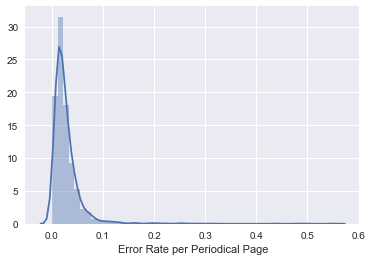

In [38]:
# %load shared_elements/summary.py
summary = reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [39]:
# %load shared_elements/top_errors.py
errors_summary = reports.get_errors_summary( summary )
reports.top_errors( errors_summary, 10 )[:50]

[("'", 3130),
 ('e', 2578),
 ('m', 2131),
 ('w', 1979),
 ('t', 1667),
 ('r', 1597),
 ('f', 1166),
 ('d', 1140),
 ('g', 1082),
 ('n', 1003),
 ('x', 620),
 ('oo', 585),
 ('th', 426),
 ('co', 279),
 ('ga', 221),
 ('k', 177),
 ('ex', 167),
 ('u', 163),
 ("the'", 161),
 ('io', 149),
 ('pp', 130),
 ("''", 120),
 ('z', 115),
 ('re', 114),
 ('pa', 110),
 ('thot', 108),
 ('ky', 99),
 ('jno', 98),
 ('wm', 95),
 ('ro', 85),
 ('va', 84),
 ("an'", 83),
 ('ma', 80),
 ('al', 77),
 ('tion', 75),
 ("to'", 75),
 ("'a", 74),
 ('altho', 74),
 ('mt', 69),
 ('ti', 69),
 ('brot', 65),
 ('zo', 64),
 ('maynor', 61),
 ('ft', 61),
 ('em', 58),
 ("and'", 58),
 ('ip', 58),
 ("oakwood's", 57),
 ('strother', 57),
 ('br', 57)]

## Correction 8 -- Separate Squash Words

In [41]:
# %load shared_elements/separate_squashed_words.py
import pandas as pd
from math import log

prev = cycle
cycle = "correction8"

directories = utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

verified_tokens = []

for filename in corpus:  
    content = utilities.readfile(directories['prev'], filename)
    clean.get_approved_tokens(content, spelling_dictionary, verified_tokens)

tokens_with_freq = dict(collections.Counter(verified_tokens))
words = pd.DataFrame(list(tokens_with_freq.items()), columns=['token','freq'])
words_sorted = words.sort_values('freq', ascending=False)
words_sorted_short = words_sorted[words_sorted.freq > 2]

sorted_list_of_words = list(words_sorted_short['token'])

wordcost = dict((k, log((i+1)*log(len(sorted_list_of_words)))) for i,k in enumerate(sorted_list_of_words))
maxword = max(len(x) for x in sorted_list_of_words)

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = utilities.readfile(directories['prev'], filename)

    text = utilities.strip_punct(content)
    tokens = utilities.tokenize_text(text)
    
    replacements = []
    
    for token in tokens:
        if not token.lower() in spelling_dictionary:
            if len(token) > 17:
                if re.search(r"[\-\-\'\"]", token):
                    pass
                else:
                    split_string = clean.infer_spaces(token, wordcost, maxword)
                    list_split_string = split_string.split()
                    
                    if clean.verify_split_string(list_split_string, spelling_dictionary):
                        replacements.append((token, split_string))
                    else:
                        pass
            else:
                pass
        else:
            pass
        
    if len(replacements) > 0:
        print("{}: {}".format(filename, replacements))
        
        for replacement in replacements:
            content = clean.replace_pair(replacement, content)
    
    else:
        pass

    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

GH18980501-V01-01-page12.txt: [('SOUTHERNMISSIONARYSOCIETY', 'SOUTHERN MISSIONARY SOCIETY')]
GH18980701-V01-02-page2.txt: [('variousinstitution', 'various institution')]
GH18990301-V01-08-page8.txt: [('correspondeducation', 'correspond education')]
GH19000501-V02-05-page6.txt: [('Ipromisetousethisoutfitinsecuring', 'I promise to use this outfit in securing')]
GH19000601-V02-06-page20.txt: [('buildingenterprises', 'building enterprises')]
GH19000701-V02-07-page17.txt: [('FiresideAccounting', 'Fireside Accounting')]
GH19000701-V02-07-page18.txt: [('subscriptionsgiven', 'subscriptions given')]
GH19000701-V02-07-page4.txt: [('representativeclass', 'representative class')]
GH19000801-V02-08-page4.txt: [('absolutelynecessary', 'absolutely necessary')]
GH19001101-V02-11-page8.txt: [('Nashvilleheadquarters', 'Nashville headquarters')]
GH19001201-V02-12-page6.txt: [('Heavenstrengthened', 'Heaven strengthened')]
GH19010601-V03-06-page6.txt: [('CSaWHATAREYOUGOODFOR', 'C S a WHAT ARE YOU GOOD FOR'

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/GH/correction8

Average verified rate: 0.9739489404051832

Average of error rates: 0.02800889767671775

Total token count: 2240715



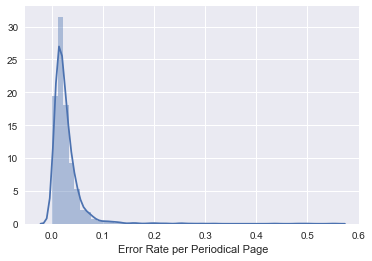

In [44]:
# %load shared_elements/summary.py
summary = reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [45]:
# %load shared_elements/top_errors.py
errors_summary = reports.get_errors_summary( summary )
reports.top_errors( errors_summary, 10 )[:50]

[("'", 3130),
 ('e', 2581),
 ('m', 2132),
 ('w', 1979),
 ('t', 1669),
 ('r', 1599),
 ('f', 1166),
 ('d', 1140),
 ('g', 1082),
 ('n', 1003),
 ('x', 621),
 ('oo', 585),
 ('th', 426),
 ('co', 279),
 ('ga', 221),
 ('k', 178),
 ('ex', 167),
 ('u', 163),
 ("the'", 161),
 ('io', 149),
 ('pp', 130),
 ("''", 120),
 ('z', 115),
 ('re', 114),
 ('pa', 110),
 ('thot', 108),
 ('ky', 99),
 ('jno', 98),
 ('wm', 95),
 ('ro', 85),
 ('va', 84),
 ("an'", 83),
 ('ma', 80),
 ('al', 77),
 ('tion', 75),
 ("to'", 75),
 ("'a", 74),
 ('altho', 74),
 ('mt', 69),
 ('ti', 69),
 ('brot', 65),
 ('zo', 64),
 ('maynor', 61),
 ('ft', 61),
 ('em', 58),
 ("and'", 58),
 ('ip', 58),
 ("oakwood's", 57),
 ('strother', 57),
 ('br', 57)]